# 🌡 Measuring Baseline

To have a better understanding on how the current implementation performs, let us replicate the anomaly detection mechanism is utilizes.

In [1]:
# Install dependencies
!pip install rrcf

  Preparing metadata (setup.py) ... done
  Created wheel for rrcf: filename=rrcf-0.4.4-py3-none-any.whl size=10602 sha256=4b3ef9e4dc1279f9b739c26ff9f5fb6420f5b5d8fffdf0c56b0dffce1ad25762
  Stored in directory: /root/.cache/pip/wheels/ea/7a/ed/e7e38a1f8de53cecb4f55d9b557e5d7875fd66410532ba26ad
Successfully built rrcf


In [3]:
# Setup
import sys
import importlib
sys.path.append('../src')

## ⚙️ Implementation




In [5]:
import run_rrcf
import pandas as pd

# Load DataSet
synthetic_ts_df = pd.read_csv('../data/generated_dataset.csv')

# Run RRCF to get anomalies
anomalies = run_rrcf.fit(synthetic_ts_df['value'])
print(f'⚠️ Found {len(anomalies)} anomalies')

⚠️ Found 32 anomalies


## 📈 Visualization

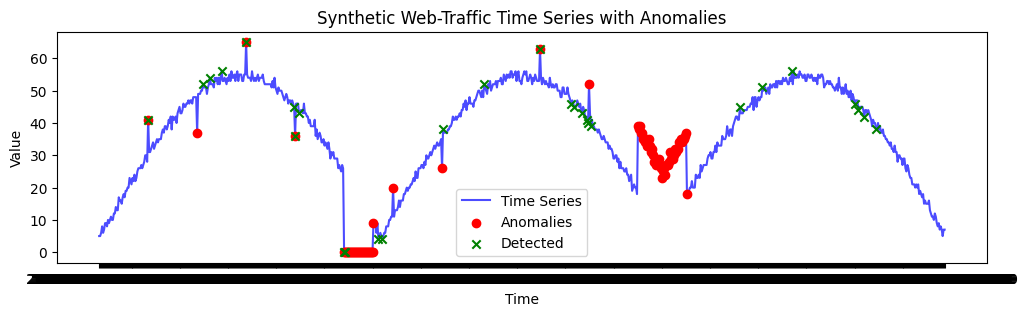

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))

# Plot the timeseries data
plt.plot(synthetic_ts_df['timestamp'], synthetic_ts_df['value'], label='Time Series', color='blue', alpha=0.7)

# Plot the known anomalies
plt.scatter(synthetic_ts_df[synthetic_ts_df['is_anomaly'] == 1]['timestamp'],
            synthetic_ts_df[synthetic_ts_df['is_anomaly'] == 1]['value'],
            color='red', label='Anomalies', zorder=5)

# Plot the detected anomalies
# Get a list of all 'index' values
anomaly_indices = [anomaly['index'] for anomaly in anomalies]
plt.scatter(synthetic_ts_df.iloc[anomaly_indices]['timestamp'],
            synthetic_ts_df.iloc[anomaly_indices]['value'],
            color='green', marker='x', label='Detected', zorder=5)

plt.title("Synthetic Web-Traffic Time Series with Anomalies")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.savefig('synthetic_ts_with_anomalies.png')
plt.show()

## 🎚️ Performance

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       774
           1       0.21      0.07      0.10        90

    accuracy                           0.88       864
   macro avg       0.56      0.52      0.52       864
weighted avg       0.83      0.88      0.85       864



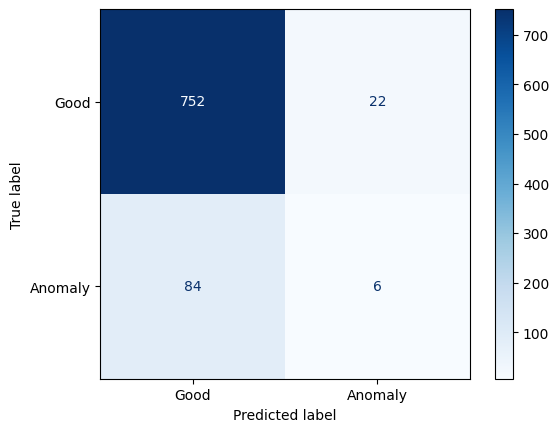

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Target
target = synthetic_ts_df['is_anomaly']

# Predicted
synthetic_ts_df['predicted'] = 0
synthetic_ts_df.loc[anomaly_indices, 'predicted'] = 1
predicted = synthetic_ts_df['predicted']

# Compute the classification report
print(classification_report(target, predicted))

# Compute the matrix
cm = confusion_matrix(target, predicted)

# Display the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.savefig('baseline_confusion_matrix.png')
plt.show()

## ↔️ Interpretation

* The model has a high overall accuracy (0.88), but this is deceptive. The macro F1 average (0.52) provides a better, more balanced view, indicating moderate-to-poor performance when both classes are considered equally important.
* The model excels at predicting the common class but almost entirely misses the rare class

* Class 0 (Majority Class)

The model performs excellently in identifying Class 0:
Precision (0.90): When the model predicts Class 0, it is correct 90% of the time.
Recall (0.97): It successfully identifies 97% of all actual Class 0 instances.
F1-Score (0.93): This high score shows a strong balance of precision and recall for this specific class.

* Class 1 (Minority Class)

The model performs very poorly in identifying Class 1:
Precision (0.21): When the model predicts Class 1, it is only correct 21% of the time. The majority of these predictions are false alarms (False Positives).
Recall (0.07): It only finds a tiny fraction (7%) of all actual Class 1 instances in the data. It misses most of the true Class 1 cases (many False Negatives).
F1-Score (0.10): This extremely low score highlights a complete failure to balance precision and recall for the minority class.